
## 👋🏽 What's up! It's Nazih

I'll be guiding you through this notebook. At any point, if you get stuck or have questions, there are three ways to get in touch:

1) Send me an email with your issue: naziherrahel@gmail.com

2) approach me after the class, and let me know what your question is.

3) or by texting me in telegram @naziher ✅


Let's get to it...




In [ ]:
%%capture
!pip install simple_image_download


In [ ]:
import numpy as np
import pandas as pd
from pathlib import Path
# from xml.dom.minidom import parse
from shutil import copyfile
import os
import shutil
import zipfile
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.display import Image, clear_output
import plotly.express as px
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Collecting data
**In case you dont have data or you want to collect data from scratch**


🔥 In order to collect our data we used a Google image downloader
[library ](https://pypi.org/project/simple-image-download/)

In [ ]:
from simple_image_download import simple_image_download as simp

def download_images(keywords, num_images_per_keyword):
    response = simp.simple_image_download

    for kw in keywords:
        try:
            response().download(kw, num_images_per_keyword)
        except Exception as e:
            print(f"Error downloading images for '{kw}': {str(e)}")

if __name__ == "__main__":
    keywords = ['building workers']
    num_images_per_keyword = 35

    download_images(keywords, num_images_per_keyword)


💾 Here we are downloading our collected images to our desktop so we can start the
annotation using our annotation tool from our previous PPT [MakeSense AI](https://www.makesense.ai/)⚡




In [ ]:
# Replace 'source_directory' with the path of the directory you want to download
source_directory = '/content/simple_images/building workers'

# Replace 'output_filename' with the desired name for the ZIP file
output_filename = 'downloaded_directory.zip'

# Create a ZIP archive of the source directory
shutil.make_archive(output_filename.split('.')[0], 'zip', source_directory)

# Provide a download link for the ZIP file
from google.colab import files
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Replace 'source_directory' with the path of our dataset
source_directory = '/content/simple_images'

# Replace 'output_filename' with the desired name for the ZIP file
output_filename = 'dataset.zip'

# Create a ZIP archive of the source directory
shutil.make_archive(output_filename.split('.')[0], 'zip', source_directory)

# Provide a download link for the ZIP file
from google.colab import files
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

---
#Converting our image format to jpg:

⏯ while building a dataset, you will end up collecting 100to 1000 of images, which is a raw data from the internet, we need to clean it and delete what's is not proper for our task, and in our case we collected images with defferent format. and to handle this essue we write a script to convert the image format to jpg format ⚓
---


In [ ]:
# Define the directory containing images
image_dir = '/content/drive/MyDrive/images'

# List all files in the directory
files = os.listdir(image_dir)

# Iterate through the files and rename them to .jpg
for file in files:
    if file.lower().endswith(('.jpeg', '.png')):
        new_name = os.path.splitext(file)[0] + '.jpg'  # Change the extension to .jpg
        os.rename(os.path.join(image_dir, file), os.path.join(image_dir, new_name))

print("File extensions modified to .jpg.")


File extensions modified to .jpg.


#Splitting our dataset

In [ ]:
from sklearn.model_selection import train_test_split

# Define input directories
input_images_dir = '/content/drive/MyDrive/images'  # Directory containing images in Google Drive
input_labels_dir = '/content/drive/MyDrive/labels'  # Directory containing labels in Google Drive

# Create output directories
output_base_dir = '/content/dataset'  # Output directory where split data will be stored

# Define subdirectories
subdirs = ['images', 'labels']
categories = ['train', 'val', 'test']

for category in categories:
    for subdir in subdirs:
        os.makedirs(os.path.join(output_base_dir, category, subdir), exist_ok=True)

# Get a list of image files with ".jpeg" extension
image_files = [f for f in os.listdir(input_images_dir) if f.endswith('.jpg')]

# Split the data into train, validation, and test sets using sklearn
# The 'stratify' option ensures that the class distribution is maintained
train_files, val_test_files = train_test_split(image_files, test_size=0.4, random_state=42, stratify=None)
val_files, test_files = train_test_split(val_test_files, test_size=0.5, random_state=42, stratify=None)

# Function to copy image and label files if they exist
def copy_image_label_pairs(files, source_image_dir, source_label_dir, dest_image_dir, dest_label_dir):
    for file_name in files:
        image_file_path = os.path.join(source_image_dir, file_name)
        label_file_name = file_name.replace('.jpg', '.txt')
        label_file_path = os.path.join(source_label_dir, label_file_name)
        if os.path.exists(image_file_path) and os.path.exists(label_file_path):
            shutil.copy(image_file_path, os.path.join(dest_image_dir, file_name))
            shutil.copy(label_file_path, os.path.join(dest_label_dir, label_file_name))
            print(f"Copied {file_name} and its corresponding label to {dest_image_dir} and {dest_label_dir}.")

# Copy image and label pairs to respective directories (if files exist)
copy_image_label_pairs(train_files, input_images_dir, input_labels_dir, os.path.join(output_base_dir, 'train', 'images'), os.path.join(output_base_dir, 'train', 'labels'))
copy_image_label_pairs(val_files, input_images_dir, input_labels_dir, os.path.join(output_base_dir, 'val', 'images'), os.path.join(output_base_dir, 'val', 'labels'))
copy_image_label_pairs(test_files, input_images_dir, input_labels_dir, os.path.join(output_base_dir, 'test', 'images'), os.path.join(output_base_dir, 'test', 'labels'))

print(f"Splitting completed: {len(train_files)} training images, {len(val_files)} validation images, {len(test_files)} test images.")


Copied building workers_19.jpg and its corresponding label to /content/dataset/train/images and /content/dataset/train/labels.
Copied building workers_12.jpg and its corresponding label to /content/dataset/train/images and /content/dataset/train/labels.
Copied building workers_22.jpg and its corresponding label to /content/dataset/train/images and /content/dataset/train/labels.
Copied building workers_15.jpg and its corresponding label to /content/dataset/train/images and /content/dataset/train/labels.
Copied building workers_14.jpg and its corresponding label to /content/dataset/train/images and /content/dataset/train/labels.
Copied building workers_17.jpg and its corresponding label to /content/dataset/train/images and /content/dataset/train/labels.
Copied building workers_21.jpg and its corresponding label to /content/dataset/val/images and /content/dataset/val/labels.
Copied building workers_16.jpg and its corresponding label to /content/dataset/val/images and /content/dataset/val/

---
📊 **In order to understand how your data is distributed we need to visualize it so we check which class is presented more and which one is less**  ⚖
---



In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict
# ploting the classes accurence in the data using the classes indexes

def count_class_occurrences_txt(annotation_dirs, classes):
    class_counts = defaultdict(int)

    # Iterate through the annotation directories
    for annotation_dir in annotation_dirs:
        # Iterate through the text annotation files in the specified directory
        for filename in os.listdir(annotation_dir):
            if filename.endswith('.txt'):
                txt_path = os.path.join(annotation_dir, filename)

                # Read the lines from the text file
                with open(txt_path, 'r') as file:
                    lines = file.readlines()

                # Extract class IDs from each line and map them to class names
                for line in lines:
                    parts = line.strip().split()
                    if parts:  # Ensure the line is not empty
                        class_id = int(parts[0])
                        if 0 <= class_id < len(classes):
                            class_name = classes[class_id]
                            class_counts[class_name] += 1

    return dict(class_counts)


#Data Visualisation 🦾

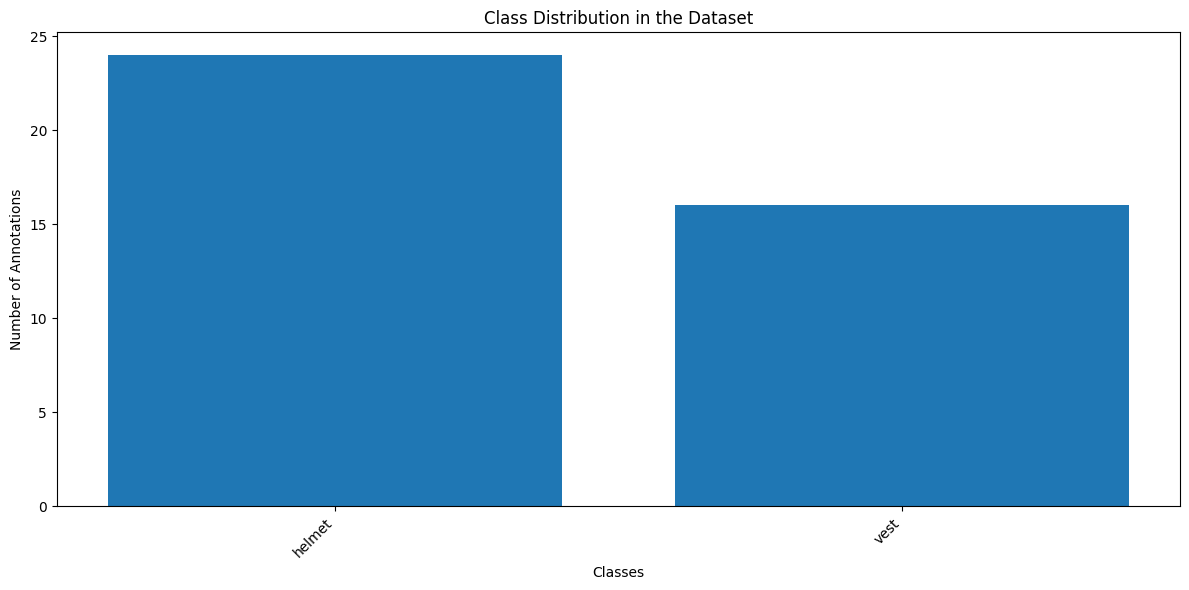

In [ ]:
annotation_directories =  ['/content/dataset/train/labels', '/content/dataset/val/labels', '/content/dataset/test/labels']

#here you should use your own classes
class_list = ['helmet', 'vest']

class_occurrences = count_class_occurrences_txt(annotation_directories, class_list)

# Create a bar plot to visualize class occurrences
plt.figure(figsize=(12, 6))
plt.bar(class_occurrences.keys(), class_occurrences.values())
plt.xlabel('Classes')
plt.ylabel('Number of Annotations')
plt.title('Class Distribution in the Dataset')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
class_occurrences

{'helmet': 24, 'vest': 16}

In [ ]:
# Replace 'source_directory' with the path of our dataset
source_directory = '/content/dataset'

# Replace 'output_filename' with the desired name for the ZIP file
output_filename = 'downloaded_directory.zip'

# Create a ZIP archive of the source directory
shutil.make_archive(output_filename.split('.')[0], 'zip', source_directory)

# Provide a download link for the ZIP file
from google.colab import files
files.download(output_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Downloading our data to our local memory ⌛ 💯

In [ ]:
!zip -r '/content/your_directory_name.zip'  '/content/sample_data'


  adding: content/sample_data/ (stored 0%)
  adding: content/sample_data/anscombe.json (deflated 83%)
  adding: content/sample_data/README.md (deflated 42%)
  adding: content/sample_data/mnist_train_small.csv (deflated 88%)
  adding: content/sample_data/mnist_test.csv (deflated 88%)
  adding: content/sample_data/california_housing_train.csv (deflated 79%)
  adding: content/sample_data/california_housing_test.csv (deflated 76%)


In [ ]:
from google.colab import files
files.download('/content/your_directory_name.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Copying our data to our google drive if needed

In [ ]:
!cp "/content/downloaded_directory.zip" "/content/drive/MyDrive/ИИКб-20/Project Management   /PPT/Nazih Errahel/Master"
